# Connect to DB

In [5]:
import os
import psycopg2

conn = psycopg2.connect(host='localhost', port=5432, dbname='ANTT', user=os.environ["PGDBUSER"], password=os.environ["PGDBPASSWORD"])
cur = conn.cursor()

# Company counts

In [19]:
query = """
    SELECT 
        cnpj, COUNT(1) as totalTrips
    FROM
        regulartrips
    GROUP BY
        cnpj
    ORDER BY totalTrips DESC;
"""
cur.execute(query)

In [20]:
result = cur.fetchall()

In [21]:
import numpy as np

totalCompanies = len(result)
tripCounts = [entry[1] for entry in result]
tripCounts = np.asarray(tripCounts)

In [22]:
print(totalCompanies)

213


# Trips per company

In [23]:
import pandas as pd

tripCountsDF = pd.DataFrame(tripCounts)
tripCountsDF.describe()

,0
count,213.000000
mean,32579.727700
std,69051.299984
min,11.000000
25%,1428.000000
50%,7769.000000
75%,26295.000000
max,398934.000000


[]

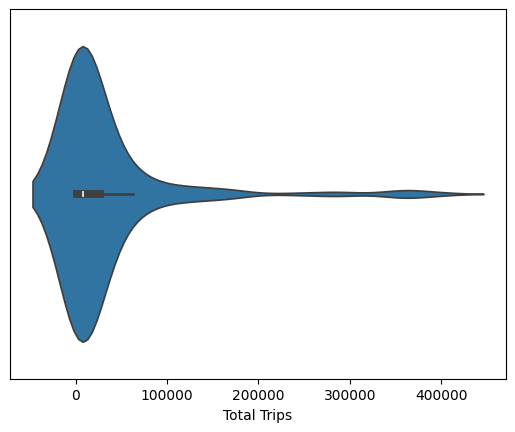

In [24]:
import seaborn as sns

boxplot = sns.violinplot(tripCountsDF, orient='h')
boxplot.set_xlabel("Total Trips")
boxplot.set_yticks([])

# Top 10 Companies

In [27]:
top10 = result[:10]

In [ ]:
import requests

def GetCompanyByCNPJ(cnpj):
    

In [28]:
top10

[('82647884000135', 398934),
 ('23542573000142', 366545),
 ('27486182000109', 364595),
 ('61084018000103', 359355),
 ('16624611000140', 350344),
 ('78586674000107', 287915),
 ('41550112000101', 286368),
 ('30069314000101', 244937),
 ('76539600000194', 176269),
 ('10788677000190', 170269)]

# Distinct lines per company

In [10]:
query = """
    SELECT 
        cnpj as cnpj, COUNT(DISTINCT line) as totalLines
    FROM
        regulartrips
    GROUP BY
        cnpj
    ORDER BY totalLines DESC;
"""
cur.execute(query)

In [11]:
result = cur.fetchall()

In [12]:
import pandas as pd

lineCountDF = pd.DataFrame(result)
lineCountDF.describe()

,1
count,213.000000
mean,31.572770
std,62.095564
min,1.000000
25%,4.000000
50%,8.000000
75%,26.000000
max,448.000000


[]

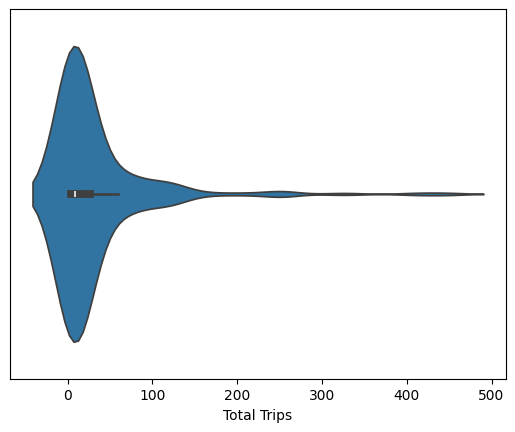

In [14]:
import seaborn as sns

boxplot = sns.violinplot(lineCountDF, orient='h')
boxplot.set_xlabel("Total Trips")
boxplot.set_yticks([])

# Number of vehicles per company

In [15]:
query = """
    SELECT 
        cnpj as cnpj, COUNT(DISTINCT plate) as totalVehicles
    FROM
        regulartrips
    GROUP BY
        cnpj
    ORDER BY totalVehicles DESC;
"""
cur.execute(query)

In [16]:
result = cur.fetchall()

In [17]:
import pandas as pd

lineCountDF = pd.DataFrame(result)
lineCountDF.describe()

,1
count,213.000000
mean,160.446009
std,304.313801
min,2.000000
25%,15.000000
50%,34.000000
75%,164.000000
max,1916.000000


[]

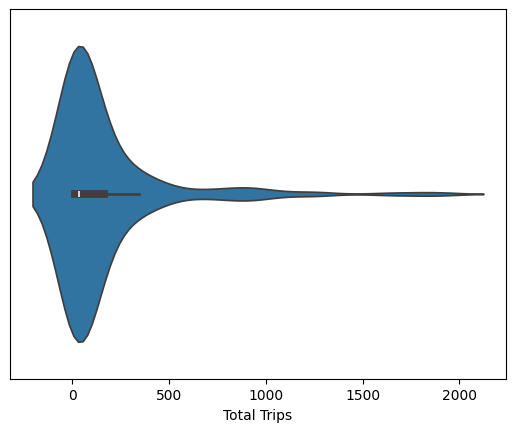

In [18]:
import seaborn as sns

boxplot = sns.violinplot(lineCountDF, orient='h')
boxplot.set_xlabel("Total Trips")
boxplot.set_yticks([])